In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



#  BLOBS dataset: DBSCAN clustering




In this exercise, we will find clusters in this dataset using the DBSCAN density-based clustering algorithm.

## Load and explore the data

Let us load the `blobs` dataset from the specified url, into a Pandas dataframe. Looking at the github site mentioned above, we see that the dataset is stored as a CSV file, and can be accessed at the url:
https://raw.githubusercontent.com/supportvectors/ml-100/master/blobs.csv

Let us, therefore, load it, and perform some basic explorations. 

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/blobs.csv'
raw_data = pd.read_csv(source)
scaler = StandardScaler()
scaled = scaler.fit_transform(raw_data)
data = pd.DataFrame(data={'x1':scaled[:, 0], 'x2': scaled[:,1]})
data['label'] = raw_data['label']
data.describe(include="all").transpose().style.set_table_styles(sv_table_styles())

**Sample rows**

In [3]:
data.sample(5)

x1        x2  label
1116  1.158023 -0.661416      2
1368 -0.011465 -0.126049      4
422  -0.997425 -0.855949      1
413   1.167298 -0.916176      2
451  -0.824879 -1.128687      1

## Data Visualization

Let us first visualize a scatter plot of the data and look at the histogram of the features. Finally, let us pull of this together with a kernel density plot, into a single plot with subplots.

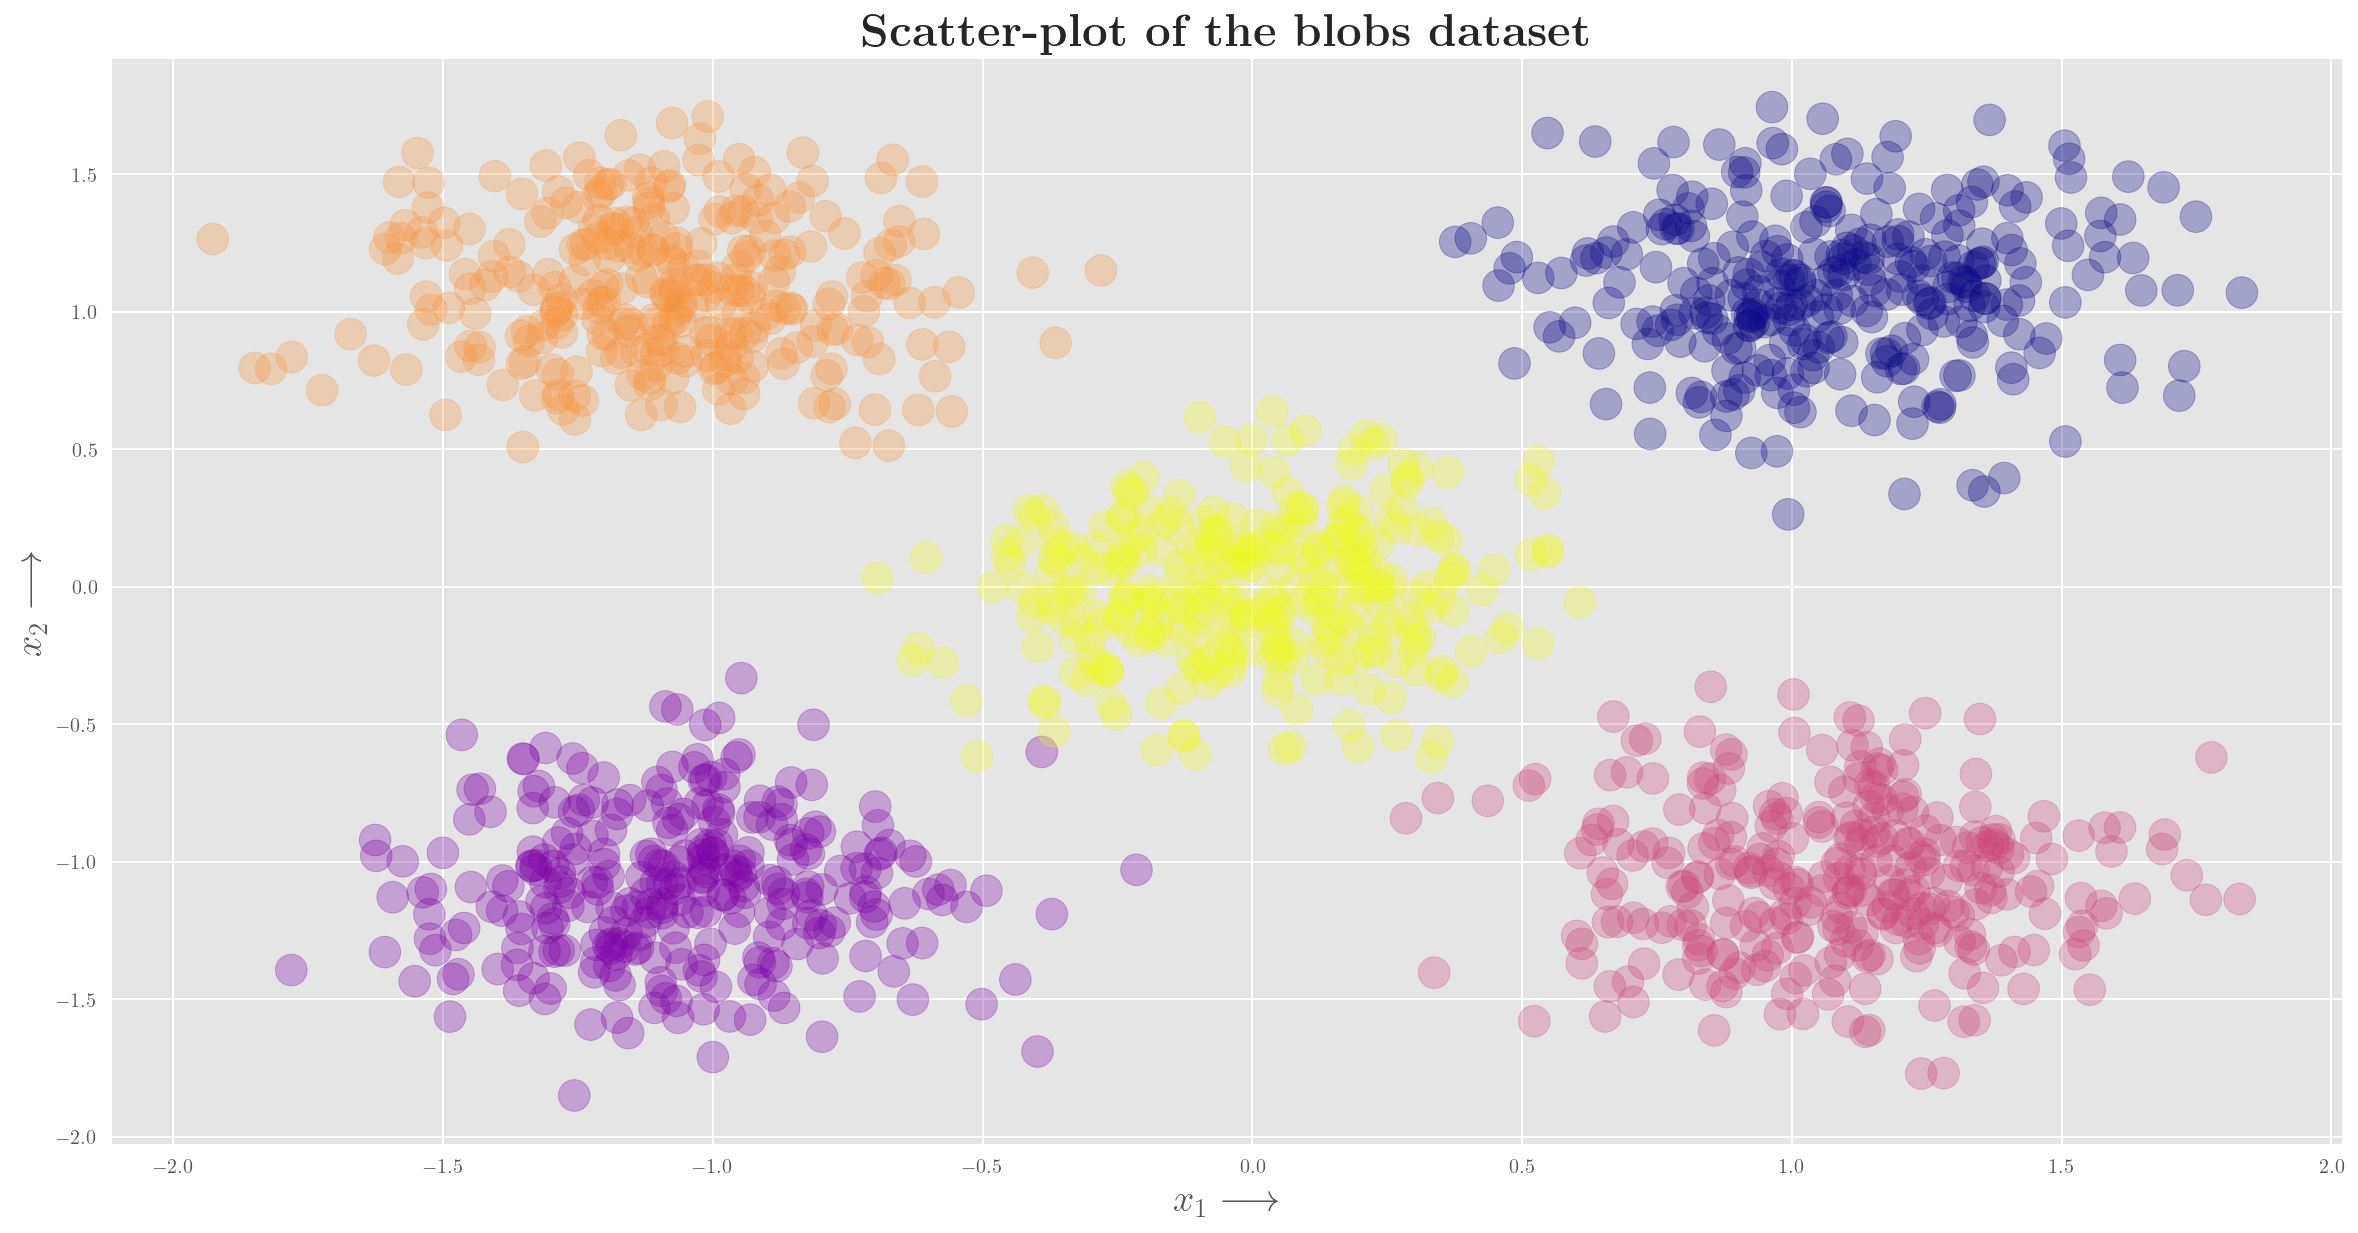

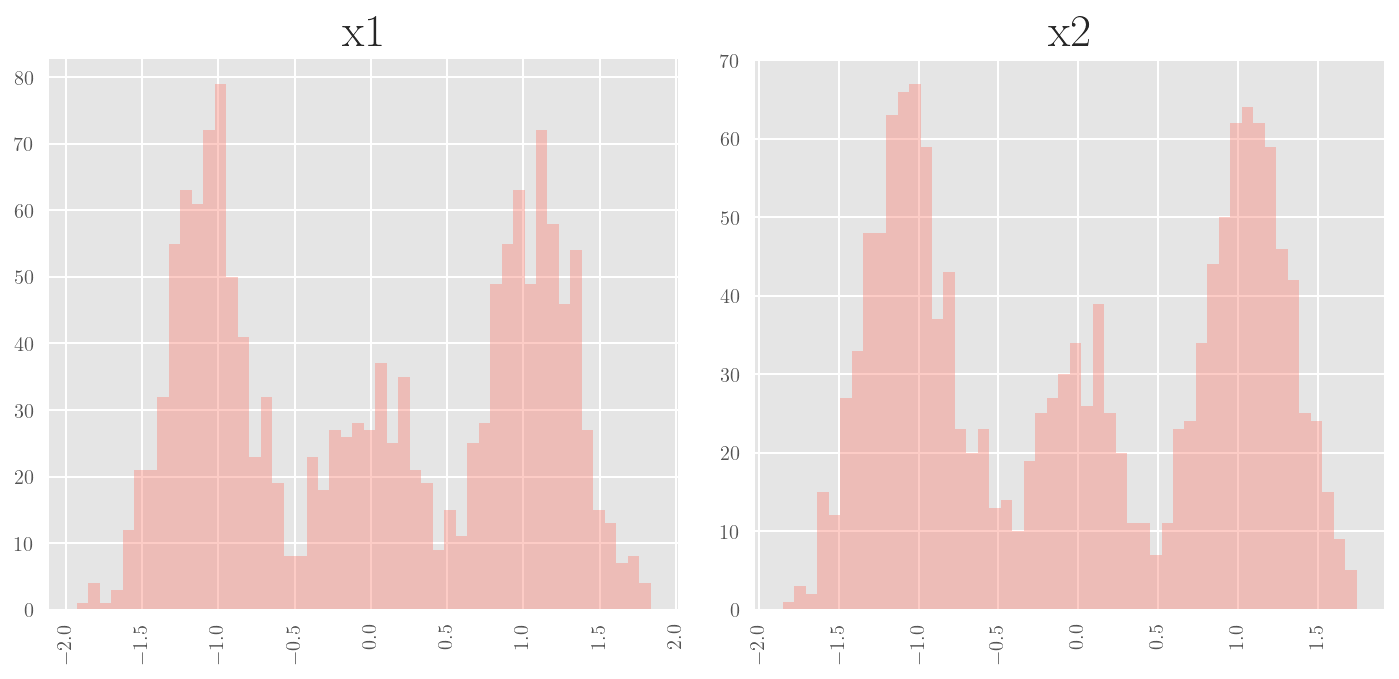

In [4]:
plt.scatter(data['x1'], data['x2'], alpha=0.3, s=250, cmap='plasma', c=data['label'])
plt.title(r'\textbf{Scatter-plot of the blobs dataset}')
plt.xlabel(r'$x_1\longrightarrow$')
plt.ylabel(r'$x_2\longrightarrow$')
plt.show()
data.drop(columns=['label']).hist(bins=50, alpha=0.4, color='salmon', xrot=90, figsize=(10, 5))
plt.tight_layout()

<Figure size 5760x5760 with 0 Axes>

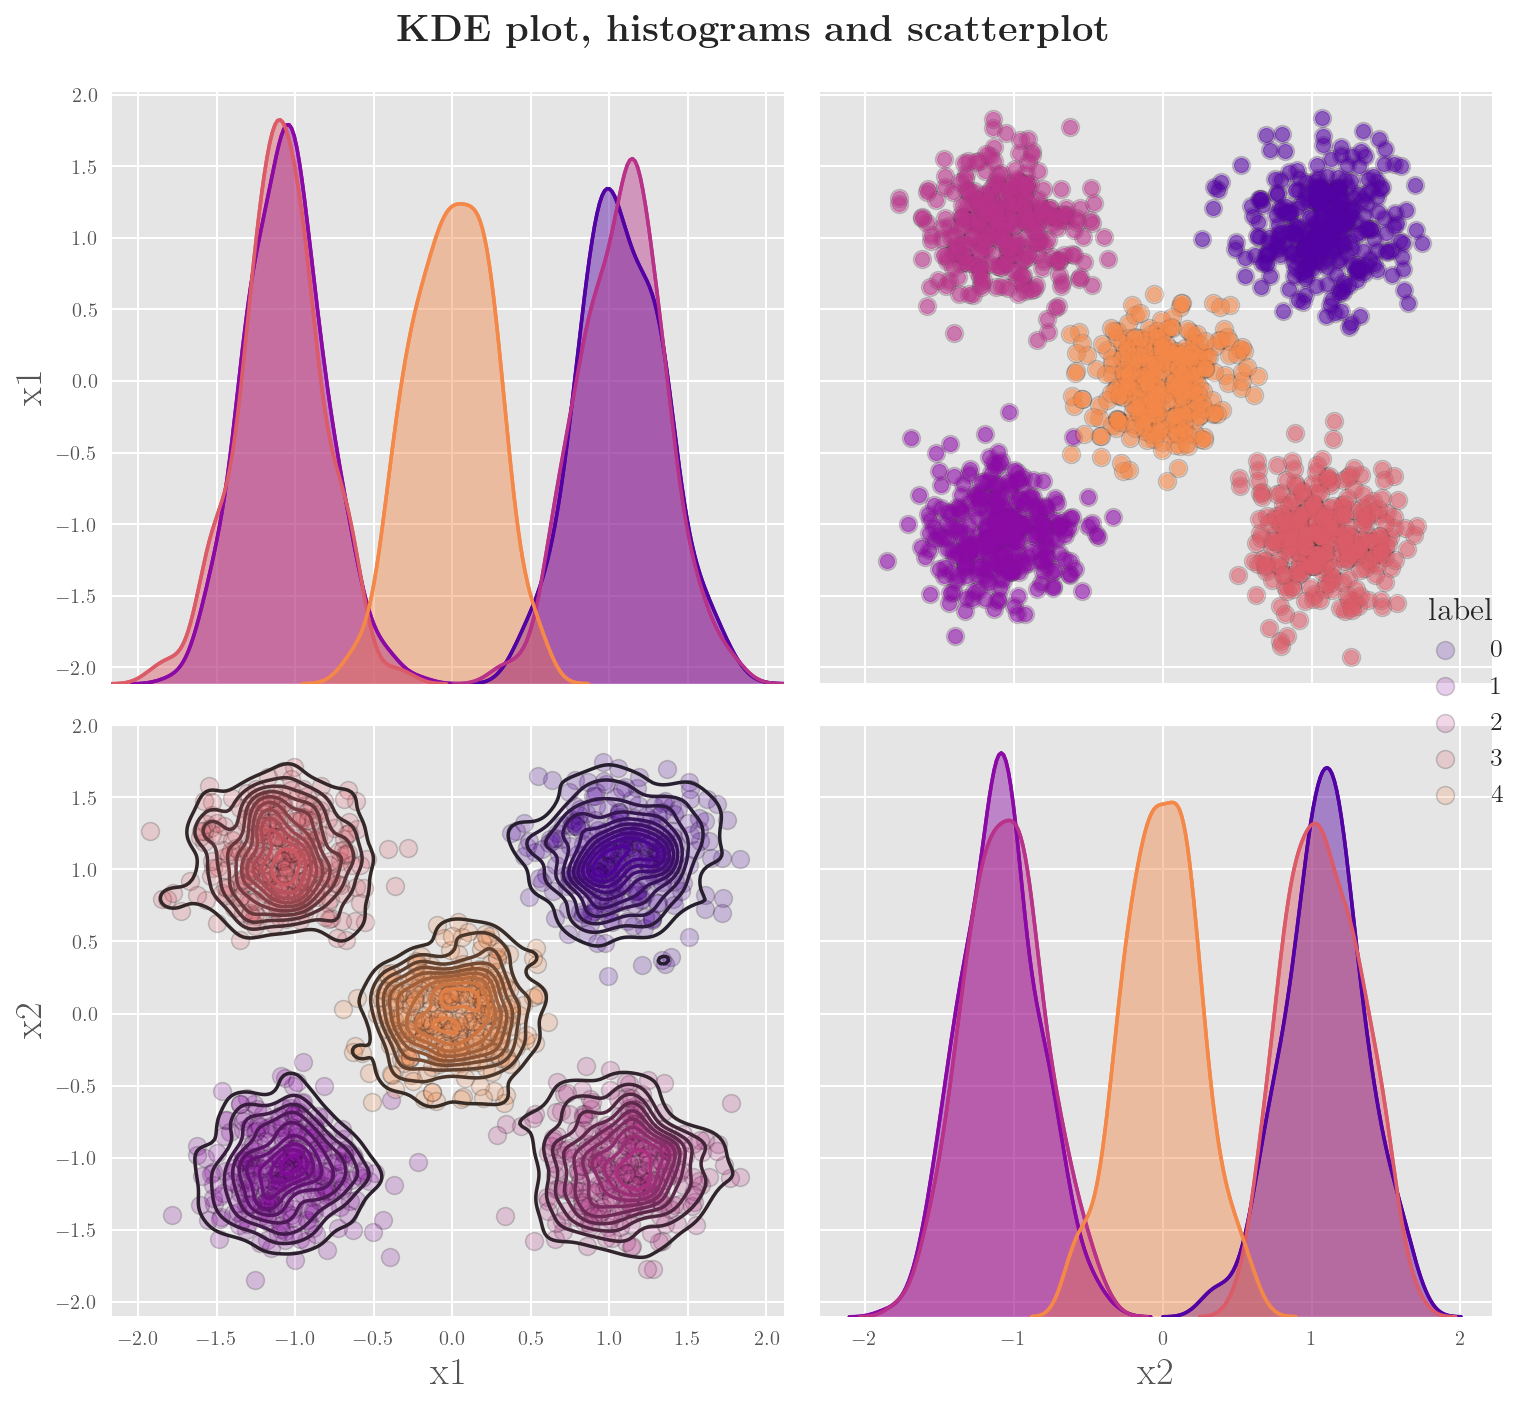

In [5]:
sns.set_palette("plasma")
plt.figure(figsize=(40,40));

sample = data.copy()
g = sns.pairplot(sample, diag_kind='kde', 
                   plot_kws = { 'alpha': 0.20, 's': 80, 'edgecolor': 'k', }, 
                   size=5, hue='label',);
g.map_diag(sns.kdeplot,  shade=True);
g.map_upper(plt.scatter, alpha=0.5);
g.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=False);
plt.suptitle(r'\textbf{KDE plot, histograms and scatterplot}')
plt.tight_layout();

## DBSCAN

Let us now cluster this data for various values of the hyper-parameters: $\epsilon, nPts$ (the neighborhood radius, and the number of neighbors needed for a point to qualify as an interior point).

In [6]:
%run dbscan_common.ipynb

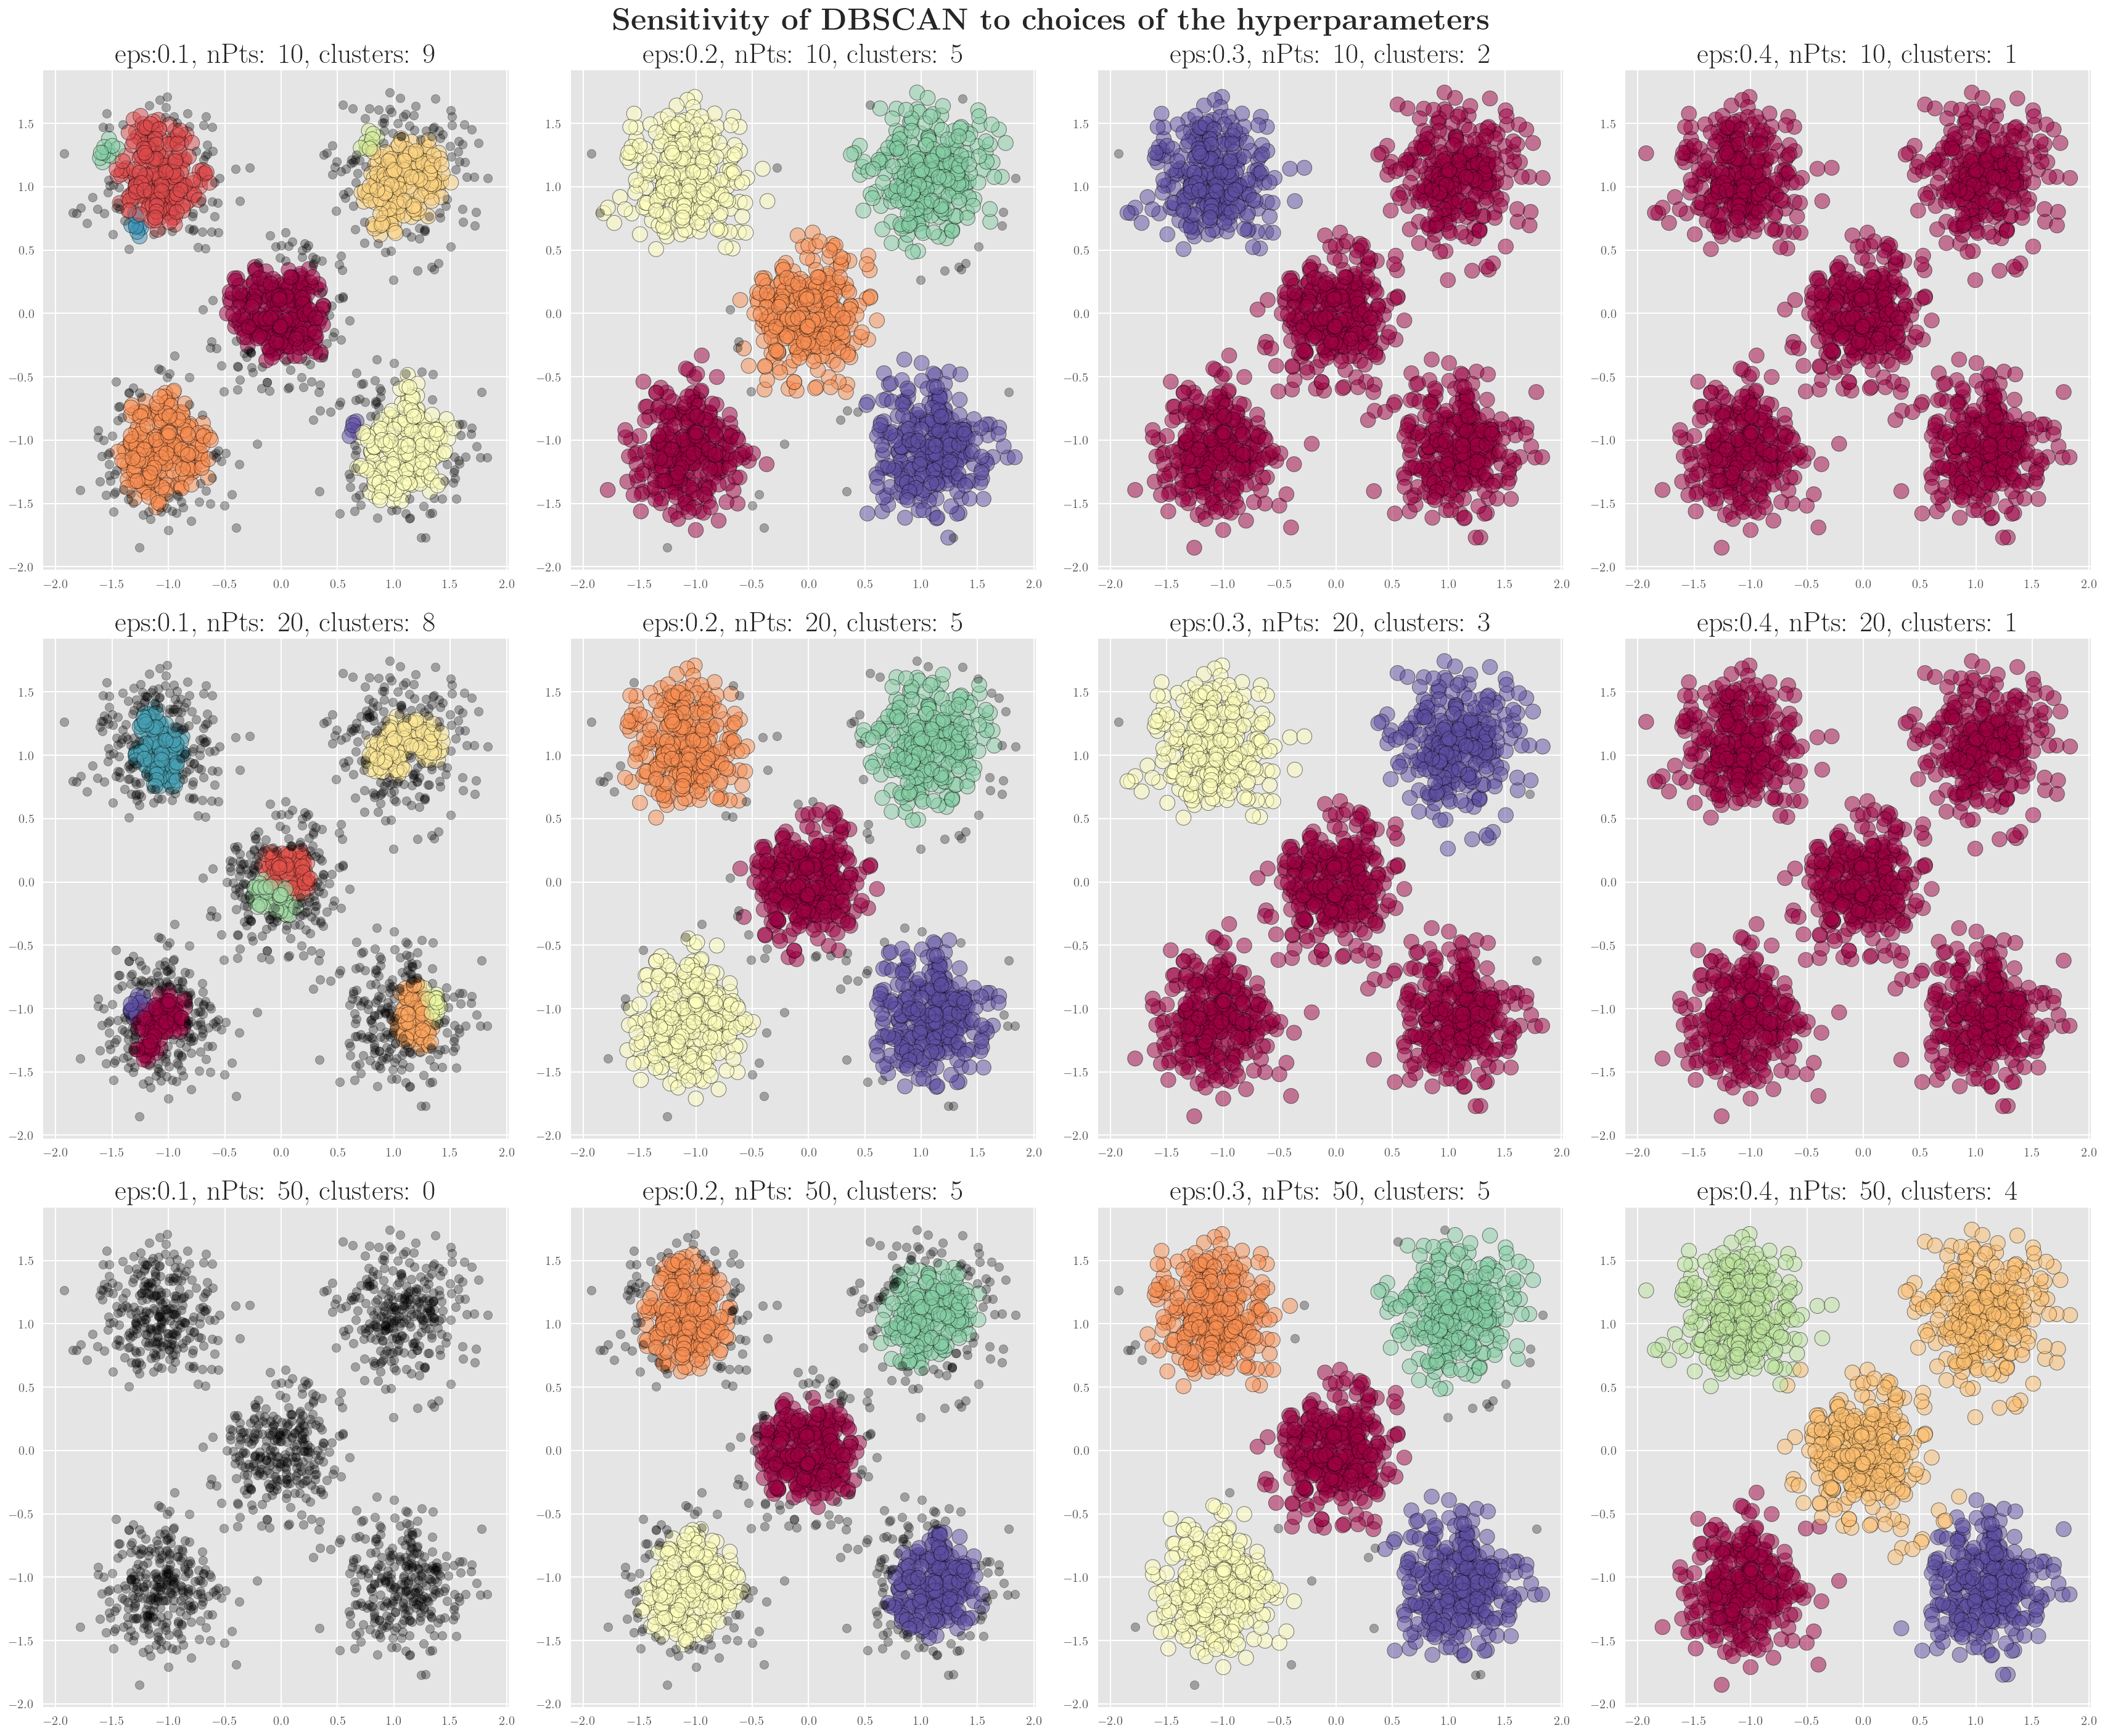

In [7]:
# Different values of the hyperparameters
epsilons = [0.1, 0.2, 0.3, 0.4]
neighbors = [10, 20, 50]

quality = dbscan_cluster(epsilons=epsilons, neighbors=neighbors, data=data)

In the above plots, the outliers are marked in grey.

We observe that the clustering is markedly different for different values of the hyperparameters. **Which of these clusters would you consider optimal?**

### Clustering quality metrics
Let us now observe the clustering quality metrics, and see how it agrees with your intuition.

In [8]:
quality.style.highlight_max(color = 'lightgreen', axis = 0, subset =['silhouette score'])

### Conclusion

Inspecting the clustering plots, and the silhouette score table, it is apparent that we get the best clustering for the hyperparameter values: $\epsilon = 0.3, nPts = 50$ which points to a number of optimal clusters as five.
